In [15]:
import pandas as pd
import numpy as np
import os
import scipy as sp
import json
import matplotlib.pyplot as plt 
import seaborn as sns
import biosppy

# Load the data

In [4]:
DATA_PATH = '../data/formatted/'

In [5]:
#get a list of files
filenames = [file.split('.')[0] for file in os.listdir(DATA_PATH) if 'json' in file]

# List of meta data
meta_data_list = list()

# Open files and extract meta data
for filename in filenames:
    
    # Import meta dat
    data = json.load(open(DATA_PATH+ f'{filename}.json'))
    meta_data_list.append(data)
    
# Generate DataFrame
meta_data = pd.DataFrame(meta_data_list)

meta_data.head(10)

,age,channel_order,filename,hr,label_train,labels,labels_full,labels_int,sex,shape
0,54,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",A2652,57.0316,"[0, 0, 0, 0, 1, 0, 1, 0, 0]","[RBBB, PAC]","[Right bundle branch block, Premature atrial c...","[6, 4]",Male,"[12, 8680]"
1,68,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",A4228,59.4477,"[0, 0, 0, 1, 0, 0, 0, 0, 0]",[Normal],[Normal sinus rhythm],[3],Male,"[12, 5000]"
2,40,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",A2889,68.4375,"[0, 0, 0, 0, 0, 0, 1, 0, 0]",[RBBB],[Right bundle branch block],[6],Male,"[12, 15500]"
3,83,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",A6312,163.366,"[0, 0, 0, 0, 1, 0, 0, 0, 0]",[PAC],[Premature atrial complex],[4],Male,"[12, 5000]"
4,22,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",A5549,81.3458,"[0, 0, 0, 0, 0, 0, 1, 0, 0]",[RBBB],[Right bundle branch block],[6],Female,"[12, 11000]"
5,54,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",A4279,124.549,"[1, 0, 0, 0, 0, 0, 0, 0, 0]",[AF],[Atrial fibrillation],[0],Female,"[12, 11000]"
6,86,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",A3857,88.2573,"[0, 1, 0, 0, 0, 0, 0, 0, 0]",[I-AVB],[First-degree atrioventricular block],[1],Male,"[12, 5000]"
7,28,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",A0577,87.7704,"[0, 0, 0, 0, 0, 0, 1, 0, 0]",[RBBB],[Right bundle branch block],[6],Female,"[12, 8055]"
8,39,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",A2824,73.2207,"[0, 0, 0, 1, 0, 0, 0, 0, 0]",[Normal],[Normal sinus rhythm],[3],Female,"[12, 5000]"
9,65,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",A5921,67.0791,"[0, 0, 0, 0, 0, 0, 1, 0, 0]",[RBBB],[Right bundle branch block],[6],Male,"[12, 5500]"


In [13]:
shapes = meta_data['shape'].values

m_0 = np.inf
m_1 = 0

for i in range(shapes.shape[0]):
    if shapes[i][0] < m_0:
        m_0 = shapes[i][0]
    if shapes[i][1] > m_1:
        m_1 = shapes[i][1]

In [14]:
print('Min number of channels: ',m_0)
print('Max number of samples: ',m_1)

Min number of channels:  12
Max number of samples:  72000


In [18]:
record_id = 0
df = meta_data.copy()

ecg = np.load(DATA_PATH+df['filename'].values[record_id]+'.npy')

In [19]:
ecg.shape

(12, 8680)

ValueError: x, y, and format string must not be None

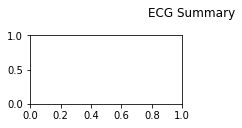

In [21]:
def plot_record(record_id,df):
    ecg = np.load(DATA_PATH+df['filename'].values[record_id]+'.npy')
    biosppy.plotting.plot_ecg(ts=np.arange(ecg.shape[1]),filtered=ecg)
    return 0

plot_record(record_id=0,df=meta_data)

# Ideas: 

1. Create a script with inital pre-processing:
    1. split by folds
    2. add signal processing (remove low-freq trend #?
    3. scaling #?
    4. angular sofrmtax?
    5. MAE/MSE metric?
    6. combined loss?

# Plan: 

1. 